# Utils

In [1]:
import matplotlib.pyplot as plt
def roc_curve(y_pred, y_true, pos_label=1):
  fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_pred, y_true, pos_label=pos_label)
  roc_auc = sklearn.metrics.auc(fpr, tpr)
  display = sklearn.metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='roc_curve')
  display.plot()
  plt.show()
  return roc_auc

# Setup

In [7]:
"""
The following file contains base classes for all estimators.
Class design and part of the code is taken and/or influenced
by the Python scikit-learn package, and specifically the
BaseEstimator.py file

# Author: Gilad Green <iml@mail.huji.ac.il>
# License: BSD 3 clause
"""
!pip install currencyconverter 
from __future__ import annotations
from abc import ABC, abstractmethod
from typing import NoReturn
import numpy as np
import pandas as pd
import sklearn

class BaseEstimator(ABC):
    """
    Base class of supervised estimators (classifiers and regressors)
    """

    def __init__(self) -> BaseEstimator:
        """
        Initialize a supervised estimator instance

        Attributes
        ----------
        fitted_ : bool
            Indicates if estimator has been fitted. Set by ``self.fit`` function
        """
        self.fitted_ = False

    def fit(self, X: np.ndarray, y: np.ndarray) -> BaseEstimator:
        """
        Fit estimator for given input samples and responses

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Input data to fit an estimator for
        y : ndarray of shape (n_samples, )
            Responses of input data to fit to

        Returns
        -------
        self : returns an instance of self.

        Notes
        -----
        After fitting sets ``self.fitted_`` attribute to `True`
        """
        self._fit(X, y)
        self.fitted_ = True
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict responses for given samples using fitted estimator

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Input data to predict responses for

        Returns
        -------
        responses : ndarray of shape (n_samples, )
            Predicted responses of given samples

        Raises
        ------
        ValueError is raised if ``self.predict`` was called before calling ``self.fit``
        """
        if not self.fitted_:
            raise ValueError("Estimator must first be fitted before calling ``predict``")
        return self._predict(X)

    def loss(self, X: np.ndarray, y: np.ndarray) -> float:
        """
        Evaluate performance under loss function specified for estimator

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Test samples

        y : ndarray of shape (n_samples, )
            True labels of test samples

        Returns
        -------
        loss : float
            Performance under loss function specified for estimator

        Raises
        ------
        ValueError is raised if ``self.loss`` was called before calling ``self.fit``
        """
        if not self.fitted_:
            raise ValueError("Estimator must first be fitted before calling ``loss``")
        return self._loss(X, y)

    @abstractmethod
    def _fit(self, X: np.ndarray, y: np.ndarray) -> NoReturn:
        """
        Fit estimator for given input samples and responses

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Input data to fit an estimator for

        y : ndarray of shape (n_samples, )
            Responses of input data to fit to
        """
        raise NotImplementedError()

    @abstractmethod
    def _predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict responses for given samples using fitted estimator

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Input data to predict responses for

        Returns
        -------
        responses : ndarray of shape (n_samples, )
            Predicted responses of given samples
        """
        raise NotImplementedError()

    @abstractmethod
    def _loss(self, X: np.ndarray, y: np.ndarray) -> float:
        """
        Evaluate performance under loss function specified for estimator

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Test samples

        y : ndarray of shape (n_samples, )
            True labels of test samples

        Returns
        -------
        loss : float
            Performance under loss function specified for estimator
        """
        raise NotImplementedError()

    def fit_predict(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Fit an estimator over given input data and predict responses for given samples

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Input data to fit an estimator for

        y : ndarray of shape (n_samples, )
            Responses of input data to fit to

        Returns
        -------
        responses : ndarray of shape (n_samples, )
            Predicted responses of given samples
        """
        self.fit(X, y)
        return self.predict(X)


# Model

In [8]:
from __future__ import annotations
from typing import NoReturn
import numpy as np
from sklearn import svm

class AgodaCancellationEstimator(BaseEstimator):
    """
    An estimator for solving the Agoda Cancellation challenge
    """

    def __init__(self):
        """
        Instantiate an estimator for solving the Agoda Cancellation challenge

        Parameters
        ----------


        Attributes
        ----------

        """
        super().__init__()
        self.clf = svm.SVC(gamma=0.01, C=1000.)

    def _fit(self, X: np.ndarray, y: np.ndarray) -> NoReturn:
        """
        Fit an estimator for given samples

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Input data to fit an estimator for

        y : ndarray of shape (n_samples, )
            Responses of input data to fit to

        Notes
        -----

        """
        self.clf.fit(X,y)

    def _predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict responses for given samples using fitted estimator

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Input data to predict responses for

        Returns
        -------
        responses : ndarray of shape (n_samples, )
            Predicted responses of given samples
        """
        return self.clf.predict(X)

    def _loss(self, X: np.ndarray, y: np.ndarray) -> float:
        """
        Evaluate performance under loss function

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
            Test samples

        y : ndarray of shape (n_samples, )
            True labels of test samples

        Returns
        -------
        loss : float
            Performance under loss function
        """
        pass


# Data Preproccessing

In [9]:
dummy_dict = dict()

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from currency_converter import CurrencyConverter
from datetime import date
from datetime import datetime



def add_one_hot_encoding_of_column(features: pd.DataFrame, feature_name: str):
    column_dummies = pd.get_dummies(features[feature_name], prefix=feature_name).apply(pd.Series)
    if not feature_name in dummy_dict:
      dummy_dict[feature_name] = column_dummies.columns
    column_dummies = column_dummies.T.reindex(dummy_dict[feature_name]).T.fillna(0)
    return pd.concat([features.drop(columns=feature_name), column_dummies], axis=1)

DATETIME_FORMAT = "%Y-%m-%d %H:%M:%S"

def load_data(filename: str, classifier_mode=True):
    """
    Load Agoda booking cancellation dataset
    Parameters
    ----------
    filename: str
        Path to house prices dataset

    Returns
    -------
    Design matrix and response vector in either of the following formats:
    1) Single dataframe with last column representing the response
    2) Tuple of pandas.DataFrame and Series
    3) Tuple of ndarray of shape (n_samples, n_features) and ndarray of shape (n_samples,)
    """
    # TODO - replace below code with any desired preprocessing
    full_data = pd.read_csv(filename).drop_duplicates()

    # features = full_data[["h_booking_id",
    #                       "hotel_id",
    #                       "accommadation_type_name",
    #                       "hotel_star_rating",
    #                       "customer_nationality"]]
    if not classifier_mode:
      full_data = full_data.dropna()
    labels = full_data["cancellation_datetime"]
    features = full_data
    return features, labels
  

def pre_proccess_data(features, labels, classifier_mode=True):
    features = features.fillna(0)
    if "cancellation_datetime" in features:
      del features["cancellation_datetime"]
    del features["h_booking_id"]
    del features["hotel_id"]
    del features["h_customer_id"]
    del features["customer_nationality"] # related to many other columns
    del features["hotel_area_code"] # could be usful
    del features["hotel_brand_code"] # ^
    del features["hotel_chain_code"] # ^
    del features["language"] # requires further analysis perhaps
    del features["guest_nationality_country_name"] # also could be useful
    features["is_first_booking"] = features["is_first_booking"].astype(float)
    features["is_user_logged_in"] = features["is_user_logged_in"].astype(float)
    features = add_one_hot_encoding_of_column(features, "original_payment_type")
    features = add_one_hot_encoding_of_column(features, "hotel_country_code")
    features = add_one_hot_encoding_of_column(features, "charge_option")
    features = add_one_hot_encoding_of_column(features, "original_payment_method")
    features = add_one_hot_encoding_of_column(features, "accommadation_type_name")
    features = add_one_hot_encoding_of_column(features, "origin_country_code")
    features["stay_length_seconds"] = (pd.to_datetime(features["checkout_date"]) - pd.to_datetime(features["checkin_date"])).apply(lambda x: x.total_seconds())
    features["booking_to_checkin_time"] = (pd.to_datetime(features["checkin_date"]) - pd.to_datetime(features["booking_datetime"])).apply(lambda x: x.total_seconds())
    features["booking_to_checkout_time"] = (pd.to_datetime(features["checkout_date"]) - pd.to_datetime(features["booking_datetime"])).apply(lambda x: x.total_seconds())
    features["hotel_live_year"] = pd.to_datetime(features["hotel_live_date"]).apply(lambda x: x.year)
    # currency conversion to USD
    c = CurrencyConverter(fallback_on_missing_rate=True)
    def cur_to_dollar(row):
      return c.convert(row.original_selling_amount, row.original_payment_currency, "USD", date=datetime.strptime(row.booking_datetime, DATETIME_FORMAT)) if row.original_payment_currency in c.currencies else row.original_selling_amount
    features['original_selling_amount_usd'] = features.apply(cur_to_dollar, axis=1)
    del features['original_payment_currency']
    del features['original_selling_amount']
    # t = c.convert(100, 'USD', 'BGN', date=date(2010, 11, 21)) - possible to do according to timestamp

    my_labels = None

    # change labels to contain delta time checkin - cancelled
    if labels is not None:
      my_labels = (pd.to_datetime(features['checkin_date']) - pd.to_datetime(labels)).apply(lambda x: x.days)

    if classifier_mode and labels is not None:
      my_labels = my_labels.apply(lambda x: 1 if np.all(pd.notnull([x])) else 0)

    # can possibly turn into seconds amounts for mathimatical fitting
    del features["booking_datetime"]
    del features["checkin_date"]
    del features["checkout_date"]
    del features["hotel_live_date"]

    # cancellation_policy_code needs to be treated but removed for now
    del features["cancellation_policy_code"]

    return features, my_labels, labels

In [11]:
features_no_null, labels_no_null = load_data("/content/drive/MyDrive/data challenge/agoda_cancellation_train.csv", classifier_mode=False)
features_with_null, labels_with_null = load_data("/content/drive/MyDrive/data challenge/agoda_cancellation_train.csv", classifier_mode=True)

df_with_null, cancellation_labels_with_null, true_labels_with_null = pre_proccess_data(features_with_null, labels_with_null, classifier_mode=True)
df_no_null, cancellation_labels_no_null, true_labels_no_null = pre_proccess_data(features_no_null, labels_no_null, classifier_mode=False)

# Fitting Classifier

In [12]:
train_X, test_X, train_y , test_y = train_test_split(df_with_null, cancellation_labels_with_null)

import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
classifier = GradientBoostingRegressor(n_estimators=100, learning_rate = 0.2, max_depth=8, verbose=1).fit(train_X, train_y)

      Iter       Train Loss   Remaining Time 
         1           0.1756            2.17m
         2           0.1610            1.98m
         3           0.1510            2.07m
         4           0.1439            2.35m
         5           0.1388            2.49m
         6           0.1346            2.60m
         7           0.1319            2.68m
         8           0.1295            2.69m
         9           0.1274            2.68m
        10           0.1259            2.68m
        20           0.1174            2.36m
        30           0.1133            2.03m
        40           0.1113            1.52m
        50           0.1085            1.14m
        60           0.1064           50.49s
        70           0.1051           35.63s
        80           0.1035           22.61s
        90           0.1011           10.90s
       100           0.0989            0.00s


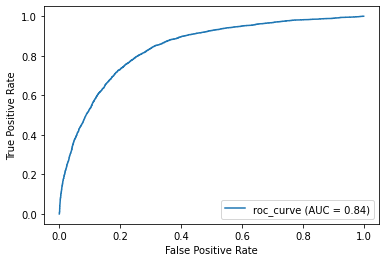

0.8416364793217028

In [13]:
roc_curve(test_y, classifier.predict(test_X), pos_label=1)

# Hyper Params

In [ ]:
max_depth = list(range(1,11))
accuracies = []
precisions = []
# from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
train_X, test_X, train_y , test_y = train_test_split(df_with_null, cancellation_labels_with_null)

for i in max_depth:
  print(f"Max Depth {i}")
  estimator = xgb.XGBRegressor(n_estimators=200, learning_rate = float(i)/10, max_depth=8, verbosity=2).fit(train_X, train_y)
  accuracy = sklearn.metrics.accuracy_score(estimator.predict(test_X), test_y)
  precision = sklearn.metrics.precision_score(estimator.predict(test_X), test_y)
  accuracies.append(accuracy)
  precisions.append(precision)

In [ ]:
import matplotlib.pyplot as plt

#accuracy
fig, ax = plt.subplots()
ax.plot(max_depth[:15], accuracies)

ax.set(xlabel='Max Depth', ylabel='Accuracy',
       title='Accuracy vs. Max Depth')
ax.grid()

plt.show()

# precision
fig, ax = plt.subplots()

ax.set(xlabel='Max Depth', ylabel='Precision',
       title='Precision vs. Max Depth')
ax.grid()

ax.plot(max_depth[:15], precisions)

plt.show()

# Fitting Regressor

In [145]:
np.random.seed(0)
train_X, test_X, train_y , test_y = train_test_split(df_no_null, cancellation_labels_no_null)

from sklearn.ensemble import GradientBoostingRegressor
regressor = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1).fit(train_X, train_y)
# regressor = xgb.XGBRegressor(n_estimators=200, learning_rate = 0.1, max_depth=3, verbosity=0).fit(train_X, train_y)
# regressor = GradientBoostingRegressor(n_estimators=1000, subsample=1, learning_rate = 0.1, max_depth=1, verbose=1, criterion="squared_error").fit(train_X, train_y)

[20:38:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [146]:
sklearn.metrics.mean_squared_error(regressor.predict(test_X), test_y)

857.9079944599183

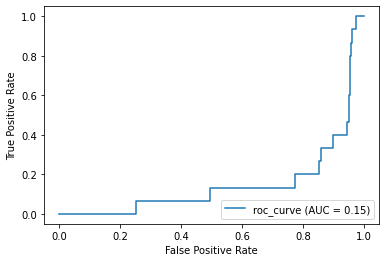

0.15054881571346043

In [147]:
roc_curve(test_y, regressor.predict(test_X), pos_label=1)

# Hyper-Params

In [ ]:
np.random.seed(0)
for i in range(1,50):

  # Fit model over data
  # estimator = AgodaCancellationEstimator().fit(train_X, train_y)

  from sklearn.ensemble import RandomForestRegressor
  estimator =RandomForestRegressor(n_estimators=50,
                            max_depth=i,
                            criterion='mse',
                          ).fit(train_X, train_y)

TypeError: ignored

# Extras

In [ ]:
sklearn.metrics.accuracy_score(estimator.predict(test_X), test_y)

In [ ]:
sklearn.metrics.precision_score(estimator.predict(test_X), test_y)

In [ ]:
total_test = test_X.copy()
total_test["label"] = test_y
total_test["prediction"] = regressor.predict(test_X)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
total_test[["label", "prediction"]]

In [ ]:
true_labels.unique()

In [ ]:
cancellation_labels

In [ ]:
# potential for learning all hyper params

param_grid = {
    "n_estimators": [5],
    "max_depth": [3, 4],
    "learning_rate": [0.1],
}

grid_cv = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=10, scoring="roc_auc", verbose=1)

# Fit
_ = grid_cv.fit(train_X, train_y)

# Output

In [16]:
def evaluate_and_export(pred_y: np.ndarray, filename: str):
    """
    Export to specified file the prediction results of given estimator on given testset.

    File saved is in csv format with a single column named 'predicted_values' and n_samples rows containing
    predicted values.

    Parameters
    ----------
    estimator: BaseEstimator or any object implementing predict() method as in BaseEstimator (for example sklearn)
        Fitted estimator to use for prediction

    X: ndarray of shape (n_samples, n_features)
        Test design matrix to predict its responses

    filename:
        path to store file at

    """
    pd.DataFrame(pred_y, columns=["predicted_values"]).to_csv(filename, index=False)

In [259]:
test_data_x = pd.read_csv("/content/drive/MyDrive/data challenge/week_6_test_data.csv")
test_data_y = pd.read_csv("/content/drive/MyDrive/data challenge/week_2_labels.csv")


In [260]:
proccessed_test_data_x, _, _ = pre_proccess_data(test_data_x, None, classifier_mode=True)

In [261]:
# predict if cancelled
cancelled = classifier.predict(proccessed_test_data_x) >= 0

In [262]:
proccessed_test_data_no_null_x, _, _ = pre_proccess_data(test_data_x, None, classifier_mode=False)

In [263]:
proccessed_test_data_only_cancelled = proccessed_test_data_no_null_x[cancelled]

In [264]:
predicted_days_before_to_cancel = regressor.predict(proccessed_test_data_only_cancelled)

In [265]:
from datetime import timedelta
time_deltas = np.array([timedelta(days=float(x)) for x in predicted_days_before_to_cancel])

In [266]:
checkin_dates = test_data_x[cancelled]["checkin_date"]

In [267]:
final_times = pd.to_datetime(checkin_dates) - time_deltas

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1190: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,


In [268]:
pd.set_option('display.max_rows', None)
final_answer_no_non_cancels = (datetime(2018, 12, 13, 0, 0, 0) >= final_times) & (final_times >= datetime(2018, 12, 7, 0, 0, 0))
final_answer_no_non_cancels = np.where(final_answer_no_non_cancels)
# 2018-12-07 and 2018-12-13

In [269]:
final_answer_no_non_cancels

(array([  2,  13,  30,  42,  52,  54,  65,  66,  73,  78,  79,  82,  92,
        111, 114, 123, 130, 131, 139, 151, 154, 155, 158, 160, 170, 176,
        179, 183, 184, 196, 201, 203, 212, 218, 222, 223, 230, 237, 242,
        243, 250, 257, 271, 274, 275, 280, 294, 303, 318, 321, 326, 329,
        335, 337, 349, 359, 368, 377, 381, 386, 391, 392, 395, 401, 405,
        406, 417, 425, 430, 435, 445, 450, 451, 458, 467, 472, 490, 500,
        508, 513, 517, 519, 524, 533, 551, 553, 554, 556, 563, 567, 568,
        573, 577, 587, 588, 609, 613, 616, 618, 620, 621, 625, 626, 631,
        637, 649, 655, 659, 662, 673, 681, 684]),)

In [270]:
final_answer = np.zeros(test_data_x.shape[0])

In [271]:
final_answer[final_answer_no_non_cancels] = True

In [272]:
total_test = test_data_x.copy()
total_test["label"] = test_data_y["cancel"]
total_test["prediction"] = final_answer

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
total_test[["label", "prediction"]]

In [274]:
print(sklearn.metrics.precision_score(test_data_y["cancel"], final_answer))
print(sklearn.metrics.accuracy_score(test_data_y["cancel"], final_answer))

0.008928571428571428
0.8171428571428572


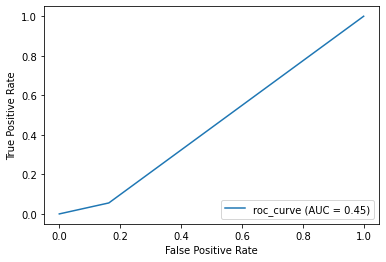

0.4463994786575432

In [275]:
roc_curve(test_data_y["cancel"], final_answer)

In [276]:
evaluate_and_export(final_answer, "212554026")